Apply all five different machine learning models Logistic Regression, K-Nearest Neighbours Classifier, Support Vector machine, Decision Tree Classifier, Random Forest Classifier on
the heart.csv dataset

1.LOGISTIC REGRESSION 

In [191]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


In [192]:
df = pd.read_csv("heart.csv")


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [194]:
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [195]:
df.tail()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [196]:
df.isna().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [197]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [198]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

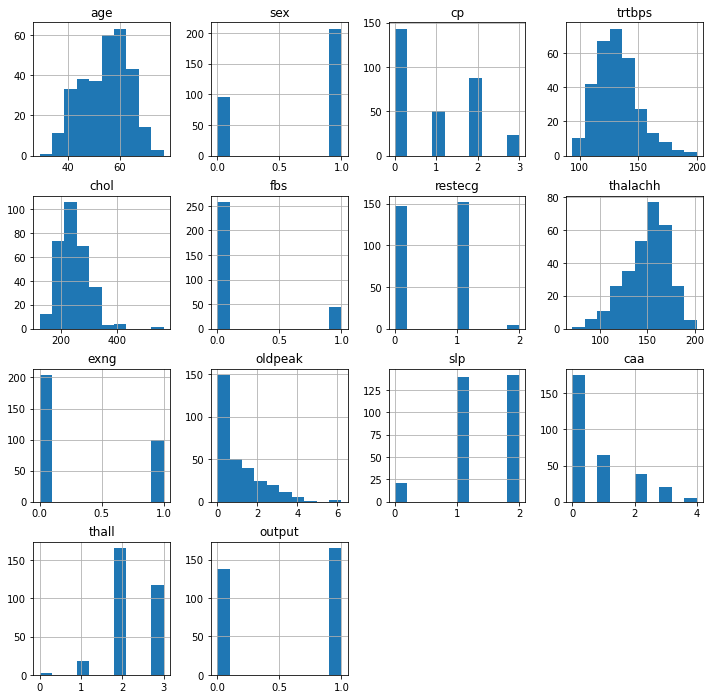

In [199]:
df.hist(figsize=(12,12))


In [200]:
x = df.drop('output', axis = 1)
y = df['output']

In [201]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [202]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [203]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [204]:
print(x.shape,train_x.shape,test_x.shape)

(303, 13) (242, 13) (61, 13)


In [205]:
logistic=LogisticRegression()

In [206]:
logistic.fit(train_x,train_y)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [207]:
train_x_prediction=logistic.predict(train_x)
training_data_accuracy=accuracy_score(train_x_prediction,train_y)

In [208]:
training_data_accuracy

0.8512396694214877

In [209]:
test_x_prediction=logistic.predict(test_x)
testing_data_accuracy=accuracy_score(test_x_prediction,test_y)

In [210]:
testing_data_accuracy

0.819672131147541

In [211]:
confusion_matrix=confusion_matrix(test_x_prediction,test_y)
print(confusion_matrix)


[[23  6]
 [ 5 27]]


In [212]:
print(classification_report(test_y,test_x_prediction))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [213]:
print(classification_report(train_y,train_x_prediction))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       110
           1       0.83      0.92      0.87       132

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242



 K-Nearest Neighbours Classifier

In [214]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [215]:
train_a, test_a, train_b, test_b= train_test_split(x, y, test_size= 0.25, random_state=0)

In [216]:
st_x= StandardScaler()  

In [217]:
train_a= st_x.fit_transform(train_a)    
test_a= st_x.transform(test_a)  

Minimum error:- 0.13157894736842105 at K = 7


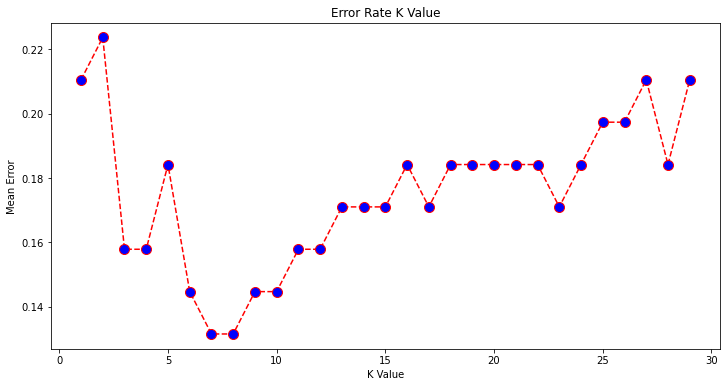

In [218]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_a, train_b)
    pred_i = knn.predict(test_a)
    error.append(np.mean(pred_i != test_b))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [219]:
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(train_a, train_b)
y_pred= classifier.predict(test_a) 
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(test_b, y_pred)

In [220]:
cmk= confusion_matrix(test_b, y_pred)

In [221]:
cmk

array([[26,  7],
       [ 3, 40]], dtype=int64)

In [222]:
accuracy_score(test_b, y_pred)

0.868421052631579

Support Vector machine

In [223]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109)

In [225]:

ml = svm.SVC(kernel='linear')

ml.fit(x_train, y_train)

y_pred = ml.predict(x_test)

In [226]:
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test) 


In [227]:
cms= confusion_matrix(y_test, y_pred)

In [228]:
cms

array([[28, 12],
       [14, 37]], dtype=int64)

In [229]:
ml.score(x_test,y_test)

0.9010989010989011

Decision Tree Classifier

In [230]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [231]:
import graphviz

In [232]:
a_train, a_test, b_train, b_test = train_test_split(x, y, test_size = 0.3, random_state = 100) 

In [233]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(a_train, b_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [234]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(a_train, b_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [235]:
def prediction(a_test, clf_object):
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(a_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred  

In [236]:
def cal_accuracy(b_test, y_pred):
    print ("Accuracy : ", accuracy_score(b_test,y_pred)) 

In [237]:
print("Results Using Gini Index:")
y_pred_gini = prediction(a_test, clf_gini)
cal_accuracy(b_test, y_pred_gini)
print("Results Using Entropy:")
y_pred_entropy = prediction(a_test, clf_entropy)
cal_accuracy(b_test, y_pred_entropy) 

Results Using Gini Index:
Predicted values:
[1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1]
Accuracy :  0.8241758241758241
Results Using Entropy:
Predicted values:
[1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1]
Accuracy :  0.8241758241758241


In [238]:
confusion_matrix=confusion_matrix(b_test,y_pred)
print(confusion_matrix)

[[23 23]
 [19 26]]


In [239]:
def printTree(classifier):
    feature_names = ['age','sex','chest pain','resting blood pressure','serum cholestoral','fasting blood sugar','electrocardiographic results','thalium stress',' colored by flourosopy',' ST segment',' oldpeak',' angina',' maxheartrate']
                       
    target_names = ['HD-Yes', 'HD-No']
    
    dot_data = tree.export_graphviz(classifier,                                      
                         out_file=None,feature_names=feature_names,
                         class_names=target_names, filled = True)
    
    tr = graphviz.Source(dot_data, format ="png")
    return tr

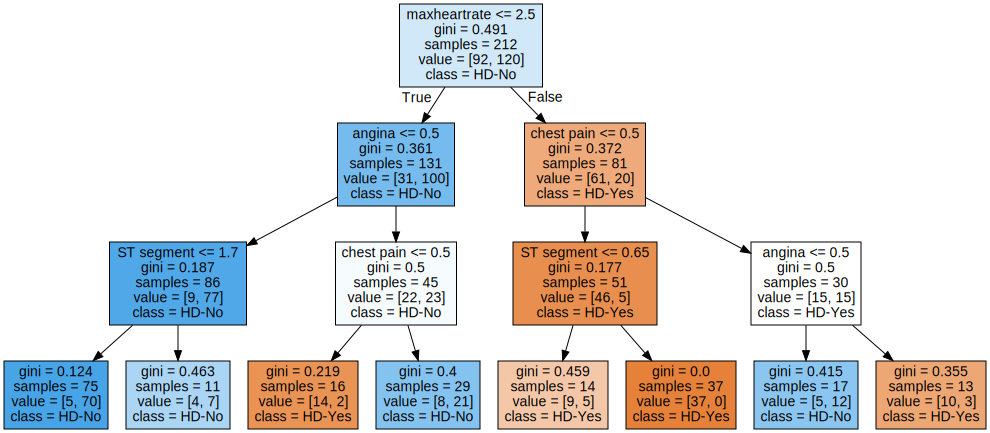

In [240]:
tr_gini = printTree(clf_gini)
tr_gini

Random Forest Classifier

In [241]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [242]:
c_train, c_test, d_train, d_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [243]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(c_train,d_train)

y_pred=clfRF.predict(c_test)

In [244]:
 print ("Accuracy : ", accuracy_score(d_test,y_pred)) 

Accuracy :  0.8688524590163934


In [245]:
confusion_matrix=confusion_matrix(d_test,y_pred)
print(confusion_matrix)

[[22  5]
 [ 3 31]]


In [246]:
print(classification_report(d_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

